# **Disaster management using geospatial & machine learning approach**



In [ ]:
# !pip install summarytools

In [ ]:
import pandas as pd
from summarytools import dfSummary

In [ ]:
df = pd.read_csv('/content/Global_Landslide_Catalog_Export.csv')

In [ ]:
df.head()

source_name                                        source_link  event_id  \
0          AGU  https://blogs.agu.org/landslideblog/2008/10/14...       684   
1    Oregonian  http://www.oregonlive.com/news/index.ssf/2009/...       956   
2     CBS News  https://www.cbsnews.com/news/dozens-missing-af...       973   
3      Reuters  https://in.reuters.com/article/idINIndia-41450...      1067   
4  The Freeman  http://www.philstar.com/cebu-news/621414/lands...      2603   

               event_date  event_time  \
0  08/01/2008 12:00:00 AM         NaN   
1  01/02/2009 02:00:00 AM         NaN   
2  01/19/2007 12:00:00 AM         NaN   
3  07/31/2009 12:00:00 AM         NaN   
4  10/16/2010 12:00:00 PM         NaN   

                                         event_title  \
0      Sigou Village, Loufan County, Shanxi Province   
1                                Lake Oswego, Oregon   
2  San Ramon district, 195 miles northeast of the...   
3                                   Dailekh district   
4                    sitio Bakilid in barangay Lahug   

                                   event_description  \
0  occurred early in morning, 11 villagers buried...   
1  Hours of heavy rain are to blame for an overni...   
2  (CBS/AP) At least 10 people died and as many a...   
3  One person was killed in Dailekh district, pol...   
4  Another landslide in sitio Bakilid in barangay...   

                                location_description location_accuracy  \
0      Sigou Village, Loufan County, Shanxi Province           unknown   
1                                Lake Oswego, Oregon               5km   
2  San Ramon district, 195 miles northeast of the...              10km   
3                                   Dailekh district           unknown   
4                    sitio Bakilid in barangay Lahug               5km   

  landslide_category  ... country_code admin_division_name  \
0          landslide  ...           CN             Shaanxi   
1           mudslide  ...           US              Oregon   
2          landslide  ...           PE               Junín   
3          landslide  ...           NP         Mid Western   
4          landslide  ...           PH     Central Visayas   

  admin_division_population  gazeteer_closest_point  gazeteer_distance  \
0                       0.0                Jingyang           41.02145   
1                   36619.0             Lake Oswego            0.60342   
2                   14708.0               San Ramón            0.85548   
3                   20908.0                 Dailekh            0.75395   
4                  798634.0               Cebu City            2.02204   

           submitted_date            created_date        last_edited_date  \
0  04/01/2014 12:00:00 AM  11/20/2017 03:17:00 PM  02/15/2018 03:51:00 PM   
1  04/01/2014 12:00:00 AM  11/20/2017 03:17:00 PM  02/15/2018 03:51:00 PM   
2  04/01/2014 12:00:00 AM  11/20/2017 03:17:00 PM  02/15/2018 03:51:00 PM   
3  04/01/2014 12:00:00 AM  11/20/2017 03:17:00 PM  02/15/2018 03:51:00 PM   
4  04/01/2014 12:00:00 AM  11/20/2017 03:17:00 PM  02/15/2018 03:51:00 PM   

  longitude  latitude  
0  107.4500   32.5625  
1 -122.6630   45.4200  
2  -75.3587  -11.1295  
3   81.7080   28.8378  
4  123.8978   10.3336  

[5 rows x 31 columns]

In [ ]:
# length
len(df)

11033

In [ ]:
dfSummary(df)

In [ ]:
df.drop(['event_date','event_id','event_title','event_description','source_name','source_link','event_time','submitted_date','location_description',
         'created_date','last_edited_date','landslide_setting','storm_name','photo_link',
         'notes',"event_import_source","event_import_id",'location_accuracy'], axis=1, inplace=True)

In [ ]:
dfSummary(df)

In [ ]:
df.isnull().sum()

landslide_category              1
landslide_trigger              23
landslide_size                  9
fatality_count               1385
injury_count                 5674
country_name                 1562
country_code                 1564
admin_division_name          1637
admin_division_population    1562
gazeteer_closest_point       1563
gazeteer_distance            1562
longitude                       0
latitude                        0
dtype: int64

In [ ]:
df['country_name'].value_counts()

country_name
United States    2992
India            1265
Philippines       675
Nepal             481
China             426
                 ... 
Albania             1
Jersey              1
Kazakhstan          1
Cambodia            1
Algeria             1
Name: count, Length: 141, dtype: int64

In [ ]:
df['landslide_size'].value_counts()

landslide_size
medium        6551
small         2767
unknown        860
large          750
very_large     102
Name: count, dtype: int64

## **Handle Missing Value:**

In [ ]:
df['landslide_category'].fillna('unknown', inplace=True)

df['landslide_trigger'].fillna('unknown', inplace=True)

df['landslide_size'].fillna('unknown', inplace=True)
# Filter out rows where 'landslide_size' is 'catastrophic'
df = df[df['landslide_size'] != 'catastrophic']

df['fatality_count'].fillna(0, inplace=True)

df['injury_count'].fillna(0, inplace=True)

df['country_name'].fillna('other', inplace=True)

df['country_code'].fillna('other', inplace=True)

df['admin_division_name'].fillna('other', inplace=True)

df['admin_division_population'].fillna(0, inplace=True)

df['gazeteer_closest_point'].fillna('other', inplace=True)

df['gazeteer_distance'].fillna(0, inplace=True)

<ipython-input-12-9fa4a9b80098>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['landslide_category'].fillna('unknown', inplace=True)
<ipython-input-12-9fa4a9b80098>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
df['admin_division_name'].value_counts().head(10)

admin_division_name
other               1634
Oregon               948
Washington           407
California           400
Kashmir              204
Uttarakhand          189
Western Region       178
Rio de Janeiro       160
Himachal Pradesh     153
England              146
Name: count, dtype: int64

In [ ]:
df.head(5)

landslide_category landslide_trigger landslide_size  fatality_count  \
0          landslide              rain          large            11.0   
1           mudslide          downpour          small             0.0   
2          landslide          downpour          large            10.0   
3          landslide           monsoon         medium             1.0   
4          landslide  tropical_cyclone         medium             0.0   

   injury_count   country_name country_code admin_division_name  \
0           0.0          China           CN             Shaanxi   
1           0.0  United States           US              Oregon   
2           0.0           Peru           PE               Junín   
3           0.0          Nepal           NP         Mid Western   
4           0.0    Philippines           PH     Central Visayas   

   admin_division_population gazeteer_closest_point  gazeteer_distance  \
0                        0.0               Jingyang           41.02145   
1                    36619.0            Lake Oswego            0.60342   
2                    14708.0              San Ramón            0.85548   
3                    20908.0                Dailekh            0.75395   
4                   798634.0              Cebu City            2.02204   

   longitude  latitude  
0   107.4500   32.5625  
1  -122.6630   45.4200  
2   -75.3587  -11.1295  
3    81.7080   28.8378  
4   123.8978   10.3336

In [ ]:
df.to_csv('new_data.csv')

## **Correlation Matrix**

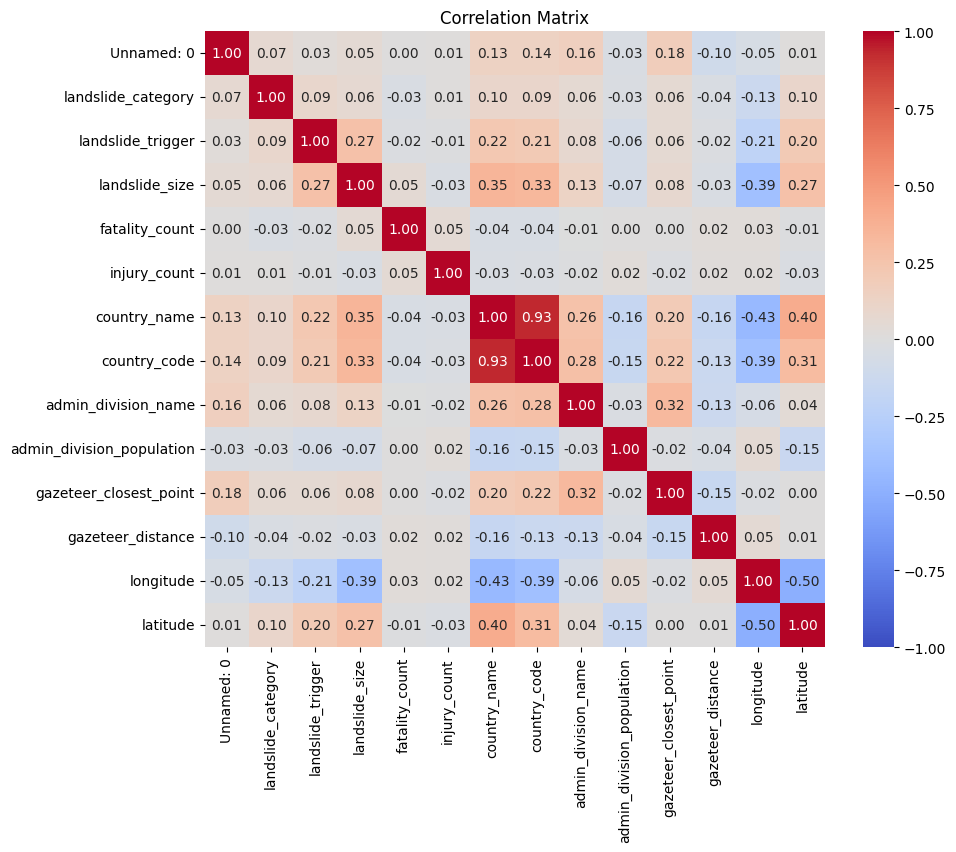

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('new_data.csv')

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column].astype(str))

# Extract numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


## **Kolmogorov-Smirnov Test**

In [ ]:
import pandas as pd
from scipy.stats import kstest, norm

# Load the dataset
data = pd.read_csv('new_data.csv')

# Extract numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Perform Kolmogorov-Smirnov test for normality
results = {}
for column in numeric_data.columns:
    test_statistic, p_value = kstest(numeric_data[column].dropna(), 'norm', args=(numeric_data[column].mean(), numeric_data[column].std()))
    results[column] = {'Test Statistic': test_statistic, 'P-Value': p_value}

# Print the results
for col, res in results.items():
    print(f"Column: {col}, Test Statistic: {res['Test Statistic']:.4f}, P-Value: {res['P-Value']:.4f}")
    if res['P-Value'] > 0.05:
        print(f"The column '{col}' is likely normally distributed (fail to reject H0).")
    else:
        print(f"The column '{col}' is not normally distributed (reject H0).")


Column: Unnamed: 0, Test Statistic: 0.0573, P-Value: 0.0000
The column 'Unnamed: 0' is not normally distributed (reject H0).
Column: fatality_count, Test Statistic: 0.4802, P-Value: 0.0000
The column 'fatality_count' is not normally distributed (reject H0).
Column: injury_count, Test Statistic: 0.4748, P-Value: 0.0000
The column 'injury_count' is not normally distributed (reject H0).
Column: admin_division_population, Test Statistic: 0.4303, P-Value: 0.0000
The column 'admin_division_population' is not normally distributed (reject H0).
Column: gazeteer_distance, Test Statistic: 0.2488, P-Value: 0.0000
The column 'gazeteer_distance' is not normally distributed (reject H0).
Column: longitude, Test Statistic: 0.2133, P-Value: 0.0000
The column 'longitude' is not normally distributed (reject H0).
Column: latitude, Test Statistic: 0.1174, P-Value: 0.0000
The column 'latitude' is not normally distributed (reject H0).


## **Data Visualization**

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 104.2 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature

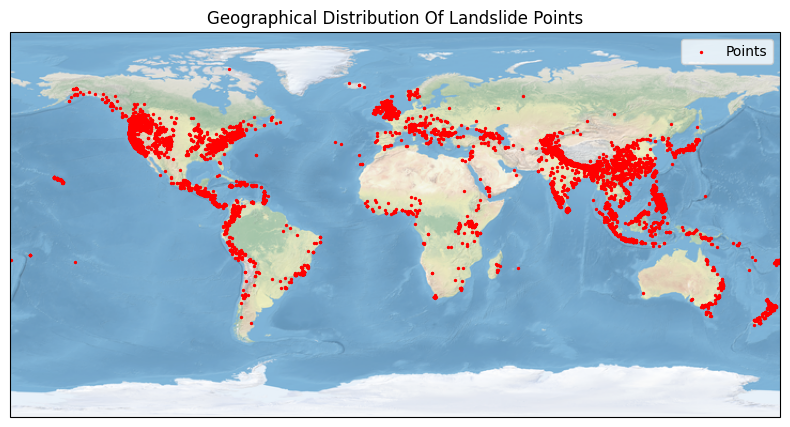

In [ ]:
# Plotting
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.scatter(df['longitude'], df['latitude'], color='red', s=2, transform=ccrs.PlateCarree(), label="Points")
plt.title('Geographical Distribution Of Landslide Points')
plt.legend()
plt.show()

In [ ]:
df['landslide_trigger'].value_counts()

landslide_trigger
downpour                   4679
rain                       2592
unknown                    1714
continuous_rain             747
tropical_cyclone            561
snowfall_snowmelt           135
monsoon                     129
mining                       93
earthquake                   89
construction                 82
flooding                     75
no_apparent_trigger          44
freeze_thaw                  40
other                        26
dam_embankment_collapse      12
leaking_pipe                 10
volcano                       1
vibration                     1
Name: count, dtype: int64

# **landslide_category**

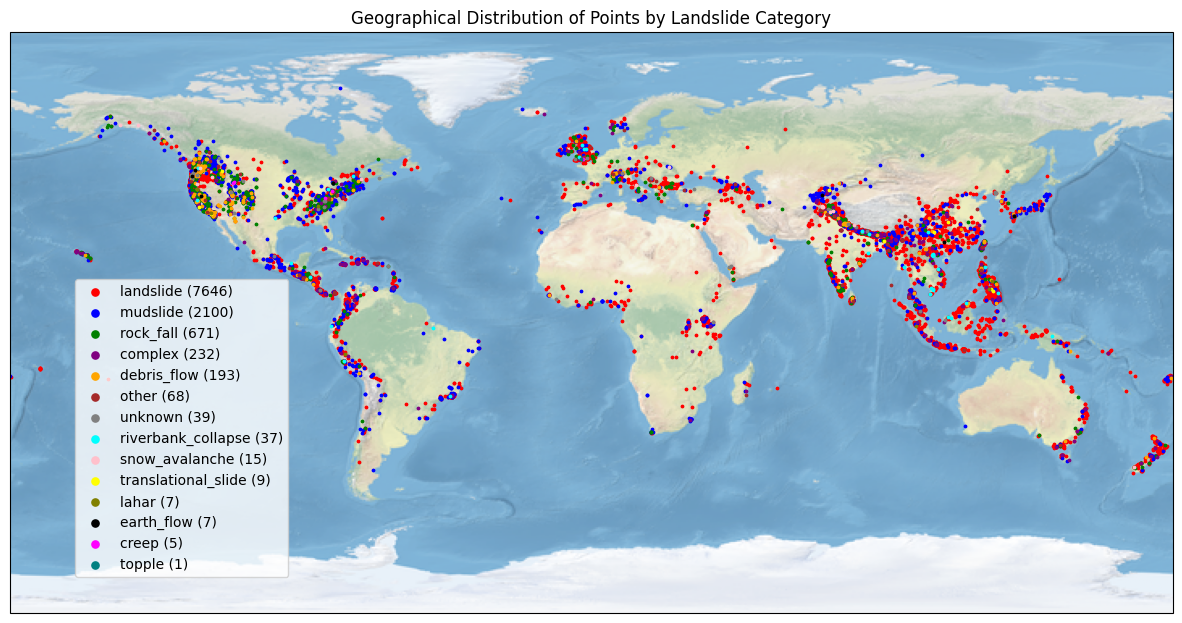

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define color map for each category
category_colors = {
    'landslide': 'red',
    'mudslide': 'blue',
    'rock_fall': 'green',
    'complex': 'purple',
    'debris_flow': 'orange',
    'other': 'brown',
    'unknown': 'gray',
    'riverbank_collapse': 'cyan',
    'snow_avalanche': 'pink',
    'translational_slide': 'yellow',
    'lahar': 'olive',
    'earth_flow': 'black',
    'creep': 'magenta',
    'topple': 'teal'
}

fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

# Prepare the legend labels with counts
legend_labels = []
for category, color in category_colors.items():
    subset = df[df['landslide_category'] == category]
    count = len(subset)
    legend_labels.append(f"{category} ({count})")
    plt.scatter(subset['longitude'], subset['latitude'], color=color, s=3,
                transform=ccrs.PlateCarree(), label=f"{category} ({count})")

plt.title('Geographical Distribution of Points by Landslide Category')

# Set legend position to bottom left
plt.legend(loc='lower left', bbox_to_anchor=(0.05, 0.05), markerscale=3)  # Adjust as needed for better fit

plt.show()


# **landslide_trigger**

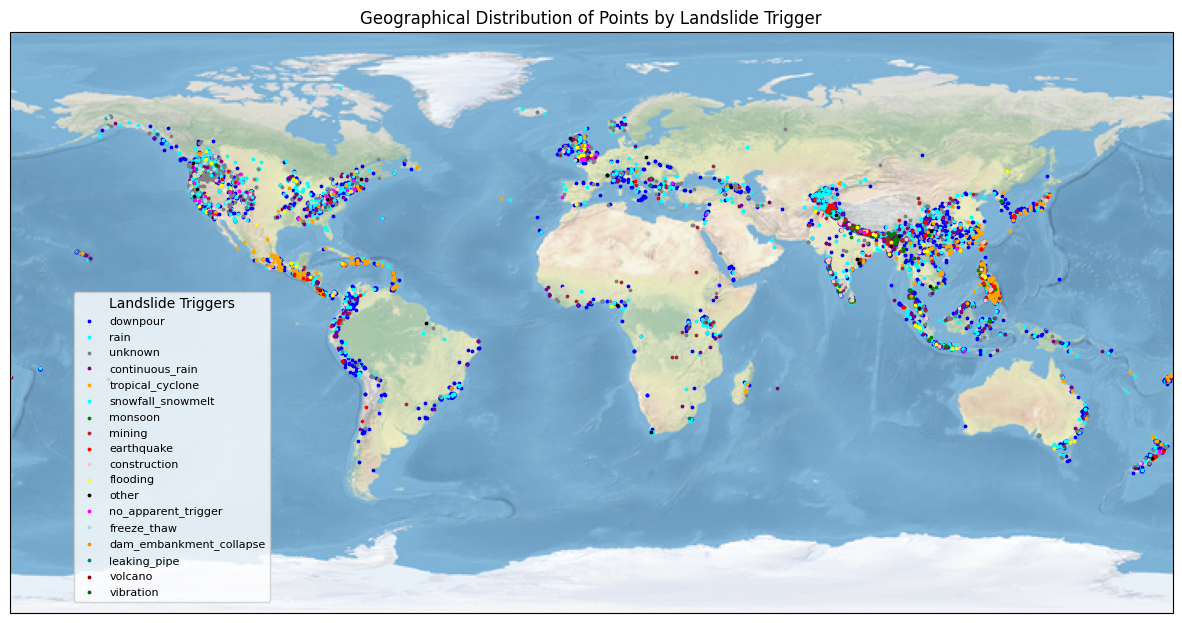

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define color map for each trigger type
trigger_colors = {
    'downpour': 'blue',
    'rain': 'aqua',
    'unknown': 'gray',
    'continuous_rain': 'purple',
    'tropical_cyclone': 'orange',
    'snowfall_snowmelt': 'cyan',
    'monsoon': 'green',
    'mining': 'brown',
    'earthquake': 'red',
    'construction': 'pink',
    'flooding': 'yellow',
    'other': 'black',
    'no_apparent_trigger': 'magenta',
    'freeze_thaw': 'lightblue',
    'dam_embankment_collapse': 'darkorange',
    'leaking_pipe': 'teal',
    'volcano': 'darkred',
    'vibration': 'darkgreen'
}

fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

# Plot each trigger with its assigned color
for trigger, color in trigger_colors.items():
    subset = df[df['landslide_trigger'] == trigger]
    plt.scatter(subset['longitude'], subset['latitude'], color=color, s=3,
                transform=ccrs.PlateCarree(), label=trigger)

plt.title('Geographical Distribution of Points by Landslide Trigger')

# Position legend at the bottom left outside the plot and set a smaller font size
plt.legend(loc='lower left', bbox_to_anchor=(0.05, 0.01), title="Landslide Triggers", prop={'size': 8})

plt.show()

# **landslide_size**

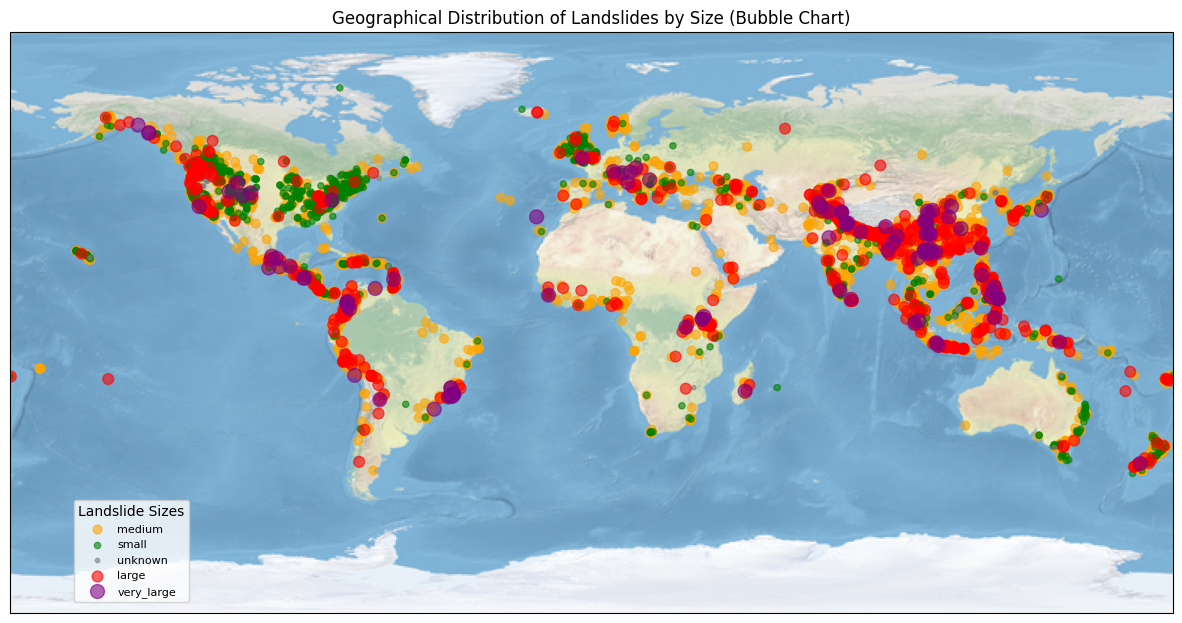

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define color and size map for each landslide size category
size_colors = {
    'medium': 'orange',
    'small': 'green',
    'unknown': 'gray',
    'large': 'red',
    'very_large': 'purple',
}

# Define size scaling for each category (adjust values for clearer bubble sizes)
size_scale = {
    'medium': 40,
    'small': 20,
    'unknown': 10,
    'large': 60,
    'very_large': 100,
    'catastrophic': 150
}

fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

# Plot each category with specific color and size
for size, color in size_colors.items():
    subset = df[df['landslide_size'] == size]
    plt.scatter(
        subset['longitude'], subset['latitude'],
        color=color,
        s=[size_scale[size]] * len(subset),  # Bubble size based on landslide_size
        alpha=0.6,  # Transparency for better visual overlap
        transform=ccrs.PlateCarree(),
        label=size
    )

plt.title('Geographical Distribution of Landslides by Size (Bubble Chart)')

# Position legend at the bottom left with smaller font size
plt.legend(loc='lower left', bbox_to_anchor=(0.05, 0.01), title="Landslide Sizes", prop={'size': 8})

plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11030 entries, 0 to 11032
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   landslide_category         11030 non-null  object 
 1   landslide_trigger          11030 non-null  object 
 2   landslide_size             11030 non-null  object 
 3   fatality_count             11030 non-null  float64
 4   injury_count               11030 non-null  float64
 5   country_name               11030 non-null  object 
 6   country_code               11030 non-null  object 
 7   admin_division_name        11030 non-null  object 
 8   admin_division_population  11030 non-null  float64
 9   gazeteer_closest_point     11030 non-null  object 
 10  gazeteer_distance          11030 non-null  float64
 11  longitude                  11030 non-null  float64
 12  latitude                   11030 non-null  float64
dtypes: float64(6), object(7)
memory usage: 1.2+ MB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.losses import Huber
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Check the DataFrame's columns
print(df.columns)

Index(['landslide_category', 'landslide_trigger', 'landslide_size',
       'fatality_count', 'injury_count', 'country_name', 'country_code',
       'admin_division_name', 'admin_division_population',
       'gazeteer_closest_point', 'gazeteer_distance', 'longitude', 'latitude'],
      dtype='object')


In [ ]:
# copy data for random forest down
df1 = df

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
df

landslide_category landslide_trigger landslide_size  fatality_count  \
0                landslide              rain          large            11.0   
1                 mudslide          downpour          small             0.0   
2                landslide          downpour          large            10.0   
3                landslide           monsoon         medium             1.0   
4                landslide  tropical_cyclone         medium             0.0   
...                    ...               ...            ...             ...   
11028            landslide              rain         medium            27.0   
11029            landslide             other          small             2.0   
11030            landslide           unknown          small             1.0   
11031  translational_slide          downpour          large            24.0   
11032             mudslide      construction          small             2.0   

       injury_count   country_name country_code admin_division_name  \
0               0.0          China           CN             Shaanxi   
1               0.0  United States           US              Oregon   
2               0.0           Peru           PE               Junín   
3               0.0          Nepal           NP         Mid Western   
4               0.0    Philippines           PH     Central Visayas   
...             ...            ...          ...                 ...   
11028           0.0          other        other               other   
11029           0.0          other        other               other   
11030           0.0          other        other               other   
11031           0.0          other        other               other   
11032           0.0          other        other               other   

       admin_division_population gazeteer_closest_point  gazeteer_distance  \
0                            0.0               Jingyang           41.02145   
1                        36619.0            Lake Oswego            0.60342   
2                        14708.0              San Ramón            0.85548   
3                        20908.0                Dailekh            0.75395   
4                       798634.0              Cebu City            2.02204   
...                          ...                    ...                ...   
11028                        0.0                  other            0.00000   
11029                        0.0                  other            0.00000   
11030                        0.0                  other            0.00000   
11031                        0.0                  other            0.00000   
11032                        0.0                  other            0.00000   

        longitude   latitude  
0      107.450000  32.562500  
1     -122.663000  45.420000  
2      -75.358700 -11.129500  
3       81.708000  28.837800  
4      123.897800  10.333600  
...           ...        ...  
11028  111.679944  -7.853409  
11029   75.680611  33.403080  
11030   91.772042  26.181606  
11031   73.472379  40.886395  
11032   78.356505  17.465630  

[11030 rows x 13 columns]

In [ ]:
# Identify categorical columns
categorical_cols = ['landslide_category', 'landslide_trigger', 'country_name',
                    'country_code', 'admin_division_name', 'gazeteer_closest_point']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Label encode the target variable
df_encoded['landslide_size'] = label_encoder.fit_transform(df_encoded['landslide_size'])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify feature columns and target
X = df_encoded.drop('landslide_size', axis=1)
y = df_encoded['landslide_size']


In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to oversample the minority classes in the entire dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' balances all classes
X, y = smote.fit_resample(X, y)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# **Random Forest**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9999563852058618
Testing Accuracy: 0.9085173501577287


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1864  109   32    6    3]
 [  61 1628  271   11    4]
 [  36  300 1590   17    3]
 [   5   13   12 1883    1]
 [   2    8    4    1 1963]]


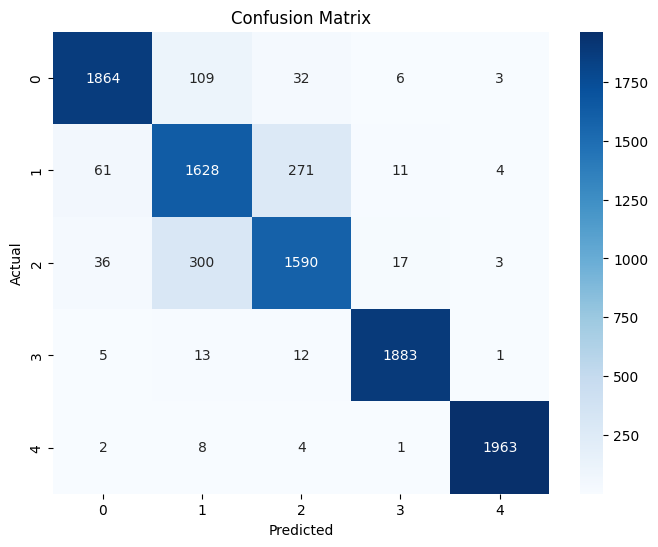

In [ ]:
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2014
           1       0.79      0.82      0.81      1975
           2       0.83      0.82      0.82      1946
           3       0.98      0.98      0.98      1914
           4       0.99      0.99      0.99      1978

    accuracy                           0.91      9827
   macro avg       0.91      0.91      0.91      9827
weighted avg       0.91      0.91      0.91      9827



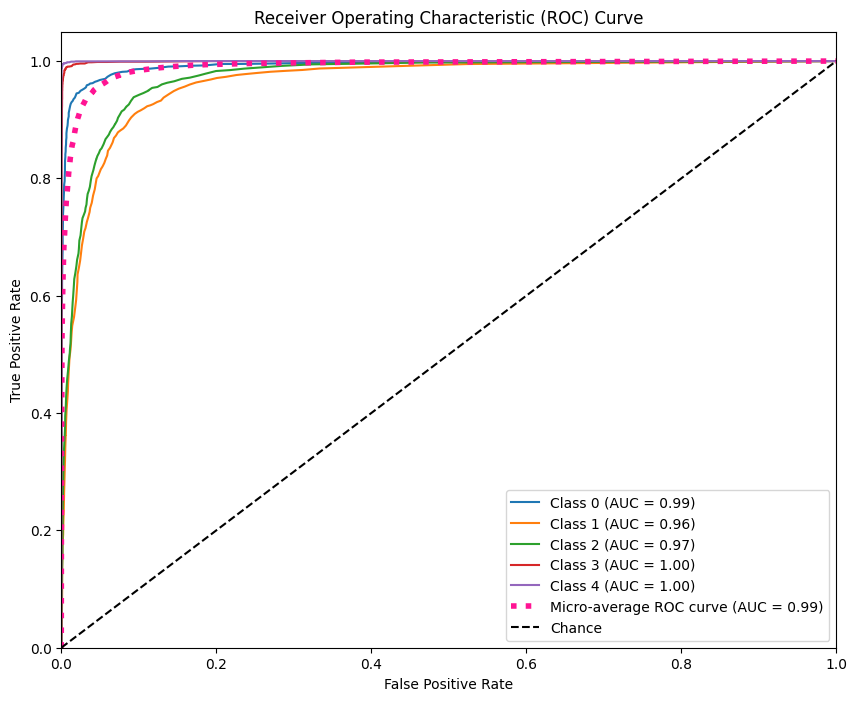

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Compute probabilities
y_test_proba = rf_model.predict_proba(X_test)

# Check if multi-class
if len(np.unique(y_train)) > 2:  # Multi-class ROC
    # For multi-class, compute ROC and AUC for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    n_classes = len(np.unique(y_train))

    # Convert y_test to one-vs-rest (binarized format)
    from sklearn.preprocessing import label_binarize
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))  # Binarize the test labels

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_test_proba.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

    # Plot micro-average ROC curve
    plt.plot(fpr_micro, tpr_micro, label=f"Micro-average ROC curve (AUC = {roc_auc_micro:.2f})",
             color='deeppink', linestyle=':', linewidth=4)

else:  # Binary ROC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")

# Plot details
plt.plot([0, 1], [0, 1], 'k--', label="Chance")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **XG-BOOST**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier


In [ ]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [ ]:
# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9127704117236567
Testing Accuracy: 0.8826701943624707


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1715  151  106    9   33]
 [  76 1559  323   10    7]
 [  51  291 1582   20    2]
 [  10   12   16 1875    1]
 [  14   13    7    1 1943]]


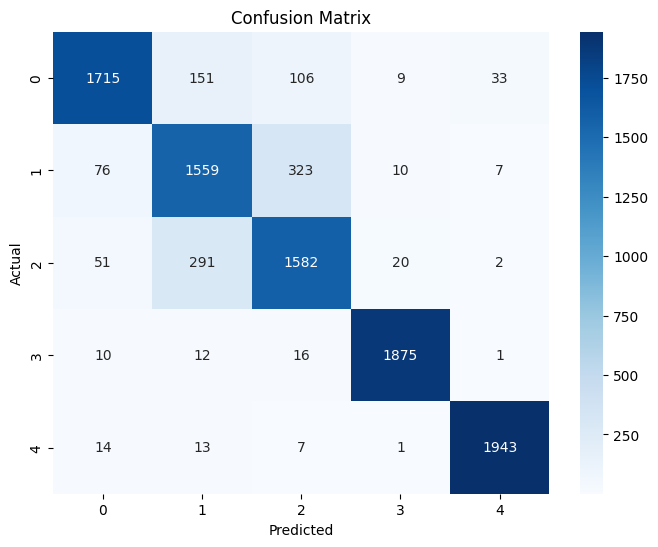

In [ ]:
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88      2014
           1       0.77      0.79      0.78      1975
           2       0.78      0.81      0.79      1946
           3       0.98      0.98      0.98      1914
           4       0.98      0.98      0.98      1978

    accuracy                           0.88      9827
   macro avg       0.88      0.88      0.88      9827
weighted avg       0.88      0.88      0.88      9827



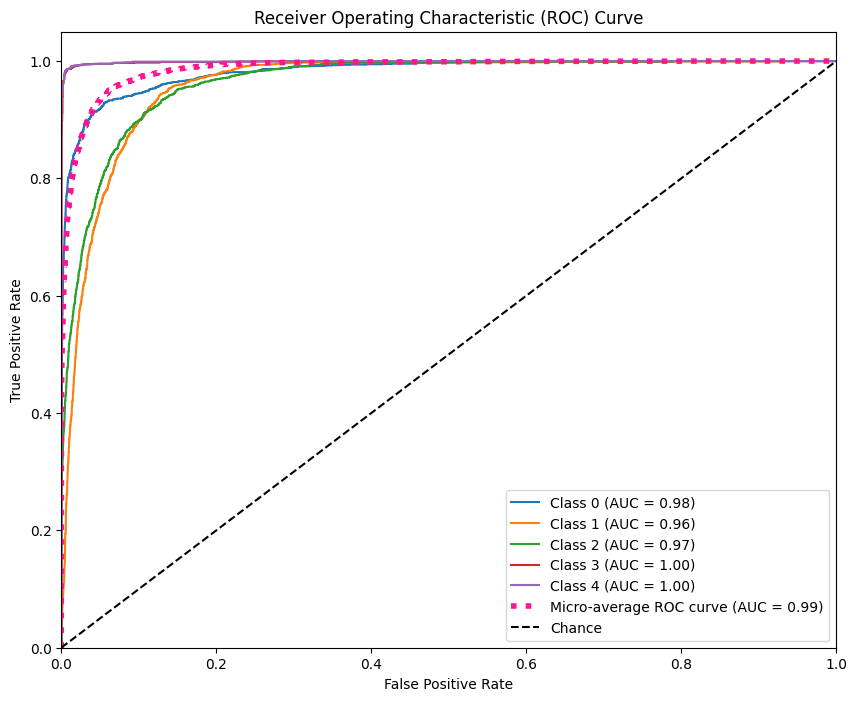

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Compute probabilities
y_test_proba = xgb_model.predict_proba(X_test)

# Check if multi-class
if len(np.unique(y_train)) > 2:  # Multi-class ROC
    # For multi-class, compute ROC and AUC for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    n_classes = len(np.unique(y_train))

    # Convert y_test to one-vs-rest (binarized format)
    from sklearn.preprocessing import label_binarize
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))  # Binarize the test labels

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_test_proba.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

    # Plot micro-average ROC curve
    plt.plot(fpr_micro, tpr_micro, label=f"Micro-average ROC curve (AUC = {roc_auc_micro:.2f})",
             color='deeppink', linestyle=':', linewidth=4)

else:  # Binary ROC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")

# Plot details
plt.plot([0, 1], [0, 1], 'k--', label="Chance")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set the number of neighbors (k) for the KNN model
k = 5  # You can adjust this value to find the best performing k

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Predict on the training data for training accuracy
knn_train_pred = knn_model.predict(X_train)
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
print("KNN Training Accuracy:", knn_train_accuracy)

# Predict on the test data for testing accuracy
knn_test_pred = knn_model.predict(X_test)
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)
print("KNN Testing Accuracy:", knn_test_accuracy)

KNN Training Accuracy: 0.8830251221214236
KNN Testing Accuracy: 0.8305688409484074


In [ ]:
# Confusion Matrix
knn_conf_matrix = confusion_matrix(y_test, knn_test_pred)
print("KNN Confusion Matrix:\n", knn_conf_matrix)

KNN Confusion Matrix:
 [[1825  110   49   13   17]
 [ 263  940  651   67   54]
 [  84  222 1552   65   23]
 [   8   17   11 1875    3]
 [   4    3    1    0 1970]]


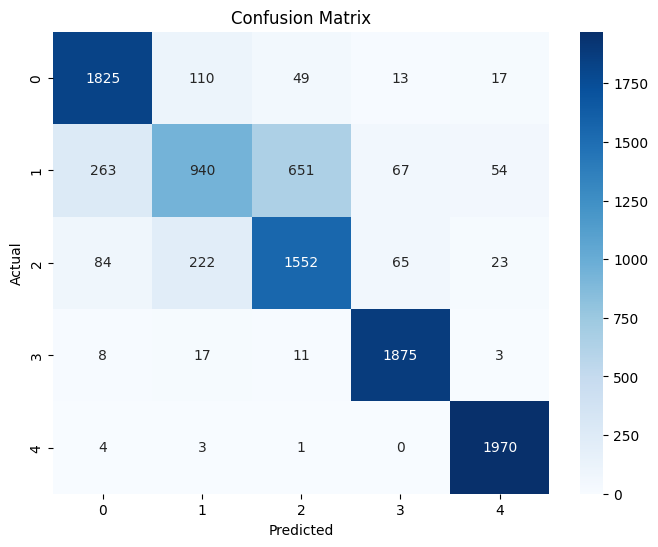

In [ ]:
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
knn_class_report = classification_report(y_test, knn_test_pred)
print("KNN Classification Report:\n", knn_class_report)

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      2014
           1       0.73      0.48      0.58      1975
           2       0.69      0.80      0.74      1946
           3       0.93      0.98      0.95      1914
           4       0.95      1.00      0.97      1978

    accuracy                           0.83      9827
   macro avg       0.83      0.83      0.82      9827
weighted avg       0.83      0.83      0.82      9827



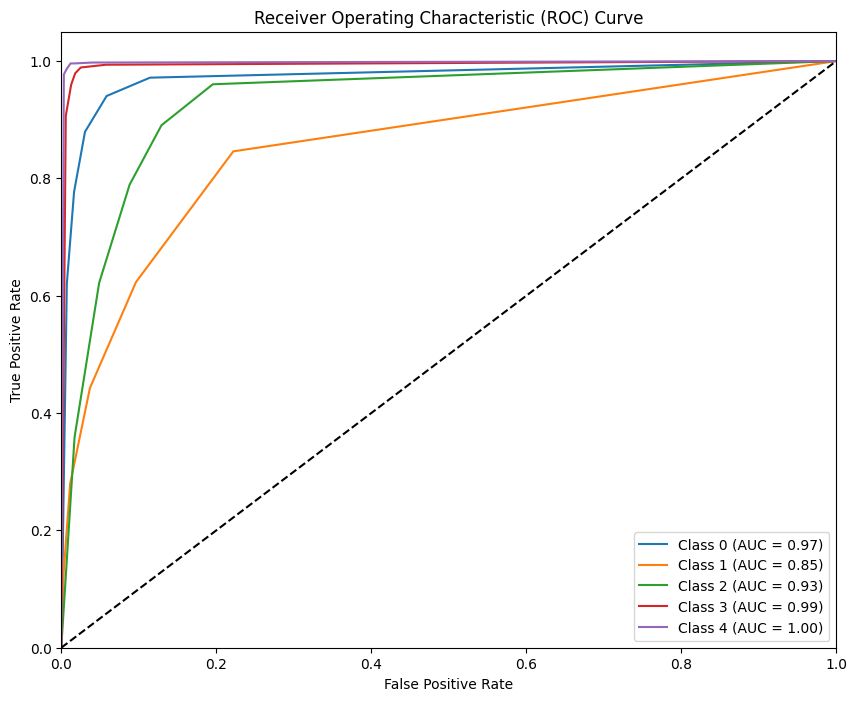

In [ ]:
# ROC Curve
# Compute probabilities
y_test_proba = knn_model.predict_proba(X_test)

# Check if multi-class
if len(np.unique(y_train)) > 2:  # Multi-class ROC
    # For multi-class, compute ROC and AUC for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(len(np.unique(y_train))):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_test_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    for i in range(len(np.unique(y_train))):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
else:  # Binary ROC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")

# Plot details
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## **Code for Taking User Input and Predicting**

In [ ]:
# Function for user input
def predict_landslide(input_data):
    # Ensure that the input data is processed similarly to training data
    input_df = pd.DataFrame([input_data])

    # One-hot encode categorical columns
    input_encoded = pd.get_dummies(input_df, columns=categorical_cols, drop_first=True)

    # Align input data columns with the training data columns
    input_encoded = input_encoded.reindex(columns=X.columns, fill_value=0)

    # Scale the input data
    input_scaled = scaler.transform(input_encoded)

    # Predict using the ensemble model
    rf_pred = rf_model.predict(input_scaled)
    dt_pred = dt_model.predict(input_scaled)
    xgb_pred = xgb_model.predict(input_scaled)

    # Stack predictions into a single array
    predictions = np.array([rf_pred, dt_pred, xgb_pred])

    # Take the mode of the predictions
    ensemble_pred = mode(predictions, axis=0).mode.flatten()  # Ensure the result is a flat array

    # Decode the predicted label back to original class
    predicted_class = label_encoder.inverse_transform(ensemble_pred)

    return predicted_class[0]

In [ ]:
# Example of user input
user_input = {
    'landslide_category': 'landslide',
    'landslide_trigger': 'rain',
    'fatality_count': 0.0,
    'injury_count': 0.0,
    'country_name': 'other',
    'country_code': 'other',
    'admin_division_name': 'other',
    'admin_division_population': 0.0,
    'gazeteer_closest_point': 'other',
    'gazeteer_distance': 0.0,
    'longitude': -122.409942,
    'latitude': 47.290915
}

# Predict the landslide size for the user input
predicted_landslide_size = predict_landslide(user_input)
print(f"Predicted Landslide Size: {predicted_landslide_size}")

Predicted Landslide Size: large


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


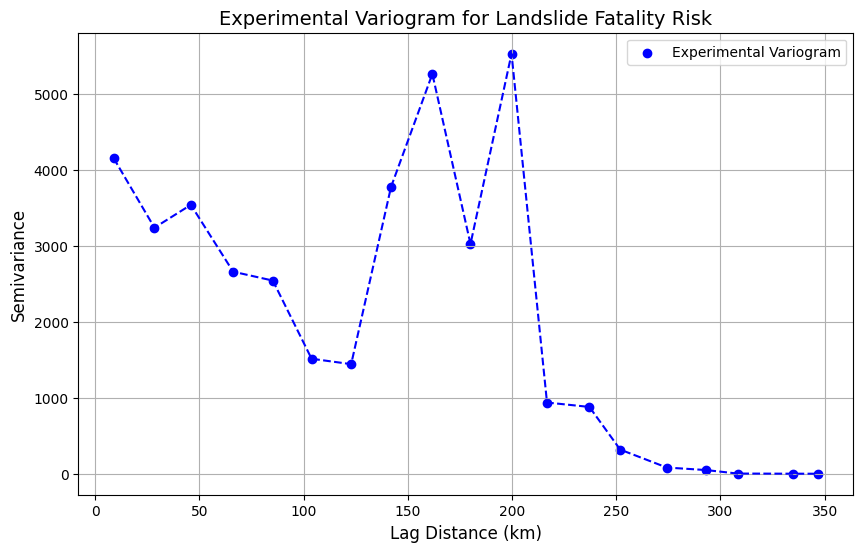

In [ ]:
# iska outut kya aa raha hai dekh:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Load the dataset and extract relevant columns
data = pd.read_csv('new_data.csv')
latitudes = data['latitude'].values
longitudes = data['longitude'].values
risk = data['fatality_count'].values

# Combine latitudes and longitudes into a single array for calculating distances
coordinates = np.vstack((longitudes, latitudes)).T

# Compute pairwise distances between all points
pairwise_distances = squareform(pdist(coordinates))

# Compute semivariance for each pair of points
semivariances = []
lags = []

for i in range(len(risk)):
    for j in range(i + 1, len(risk)):
        distance = pairwise_distances[i, j]
        semivariance = 0.5 * (risk[i] - risk[j]) ** 2
        semivariances.append(semivariance)
        lags.append(distance)

# Bin the distances into groups for better visualization
bins = np.linspace(0, max(lags), 20)
bin_indices = np.digitize(lags, bins)
binned_semivariances = []
binned_distances = []

for bin_idx in range(1, len(bins)):
    bin_values = [semivariances[i] for i in range(len(lags)) if bin_indices[i] == bin_idx]
    bin_distances = [lags[i] for i in range(len(lags)) if bin_indices[i] == bin_idx]

    if bin_values:  # Avoid empty bins
        binned_semivariances.append(np.mean(bin_values))
        binned_distances.append(np.mean(bin_distances))

# Plot the experimental variogram
plt.figure(figsize=(10, 6))
plt.scatter(binned_distances, binned_semivariances, color='blue', label='Experimental Variogram')
plt.plot(binned_distances, binned_semivariances, color='blue', linestyle='--')
plt.xlabel('Lag Distance (km)', fontsize=12)
plt.ylabel('Semivariance', fontsize=12)
plt.title('Experimental Variogram for Landslide Fatality Risk', fontsize=14)
plt.grid()
plt.legend()
plt.show()